In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [7]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [21]:
df.shape

(528, 15)

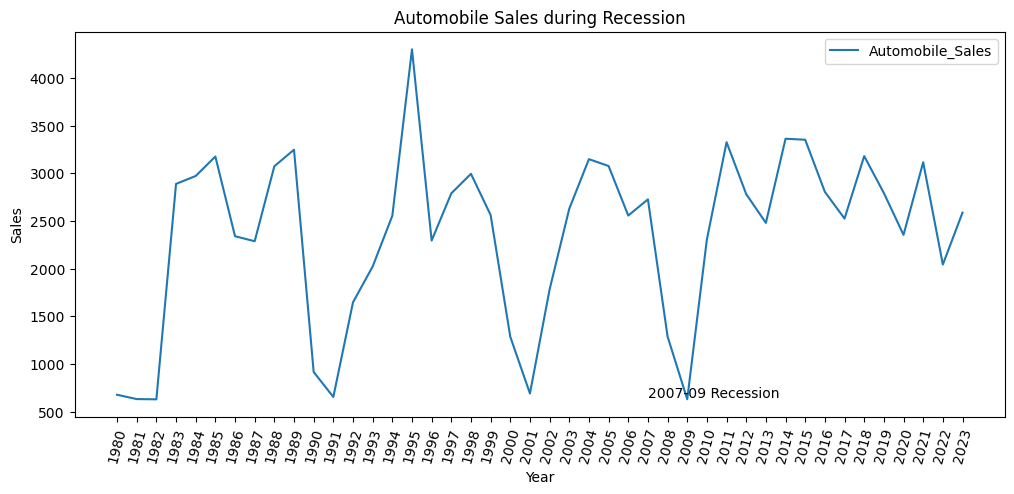

In [19]:
#TASK 1.1
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(12, 5))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Automobile Sales during Recession')
plt.legend()
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(2007, 650, '2007-09 Recession')
plt.show()

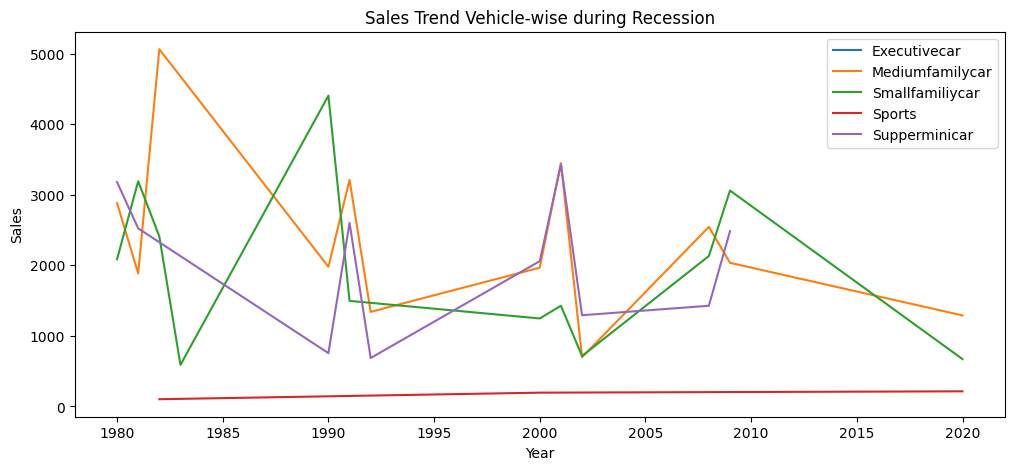

In [31]:
#TASK 1.2
df_rec = df[df["Recession"] == 1]
df_rec = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_rec.set_index('Year', inplace=True)
df_rec = df_rec.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(12, 5))
df_rec.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

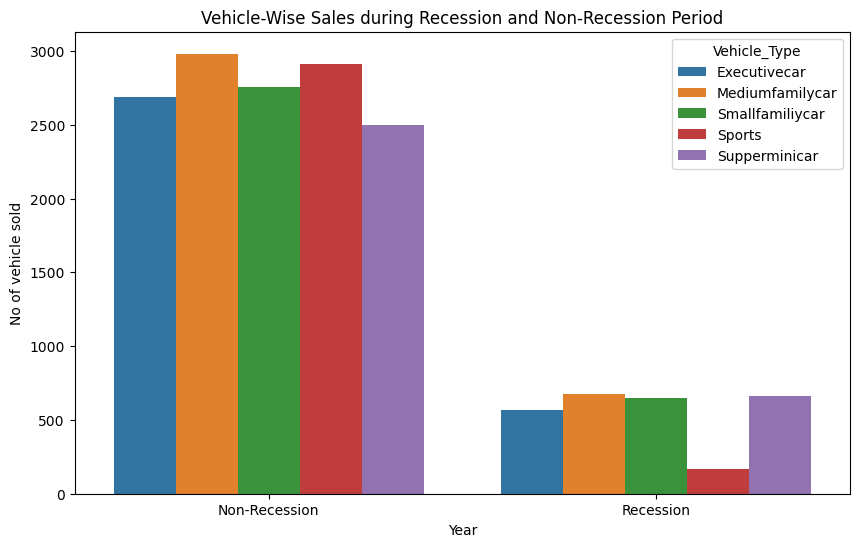

In [41]:
#TASK 1.3
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type',  data=dd)
plt.xlabel('Year')
plt.ylabel('No of vehicle sold')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

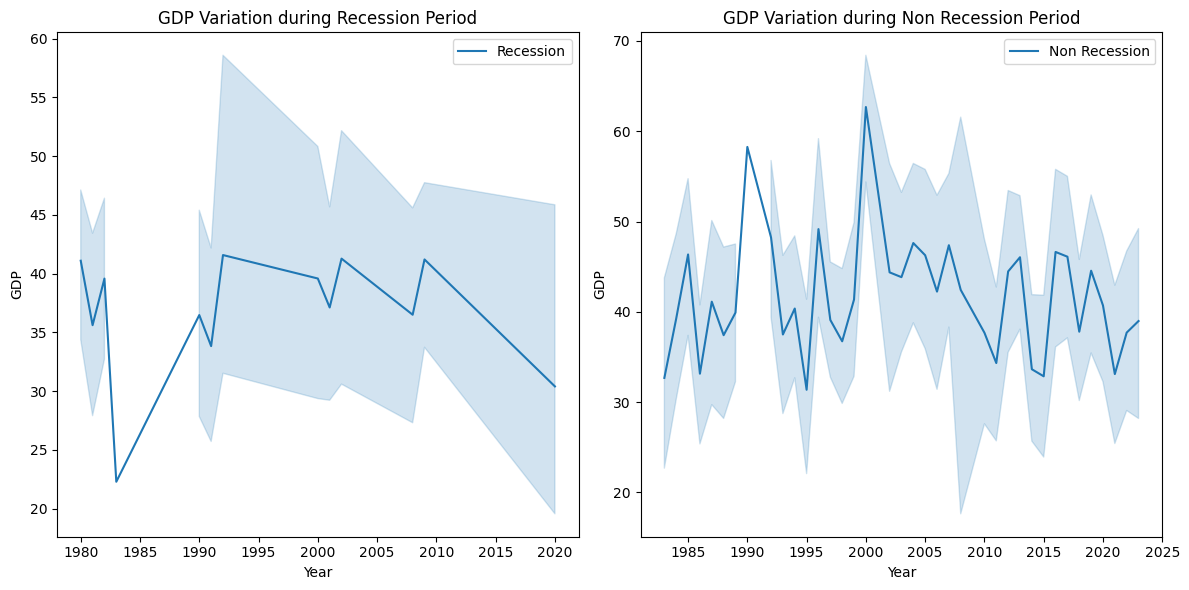

In [42]:
#TASK 1,4
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')

plt.tight_layout()
plt.show()

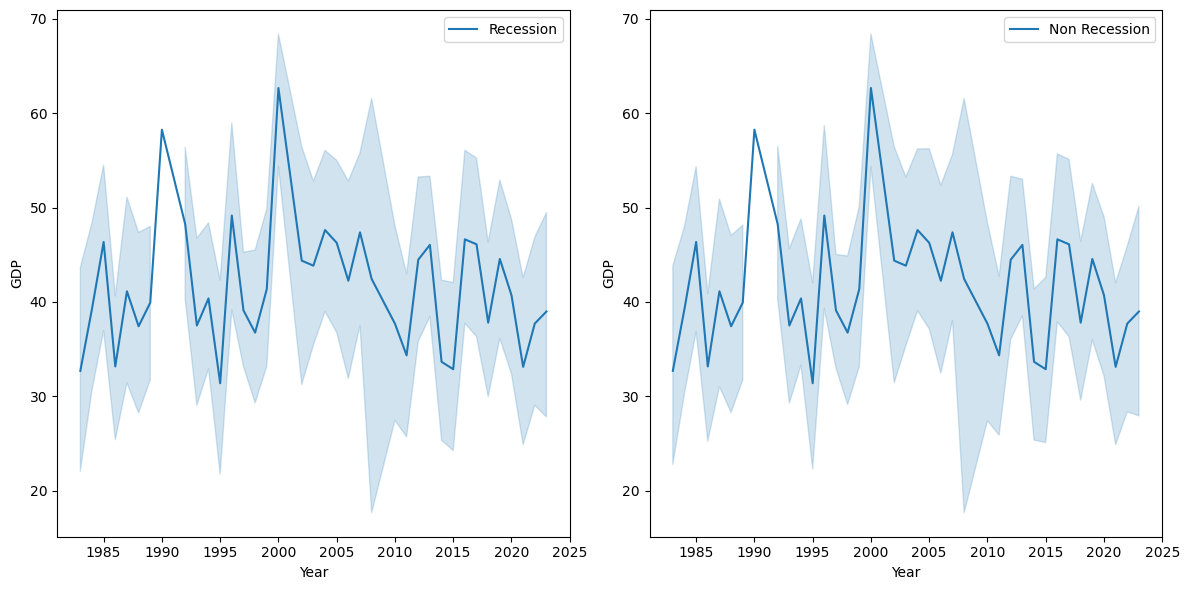

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.tight_layout()
plt.show()

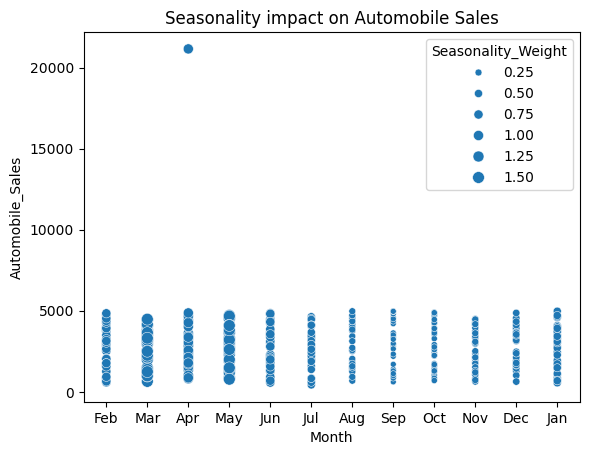

In [46]:
#TASK 1.5
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] 
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

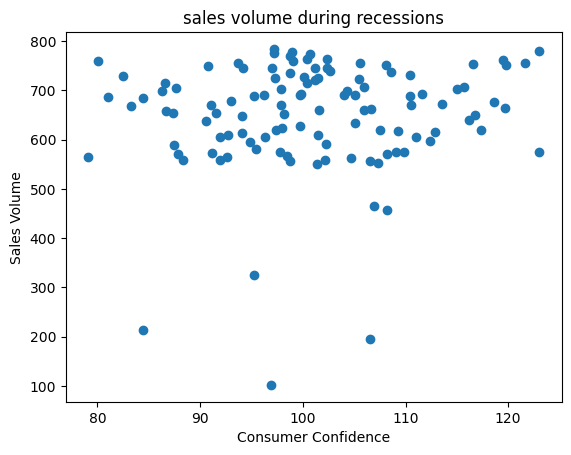

In [51]:
#TASK 1.6
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales Volume')
plt.title('sales volume during recessions')
plt.show()

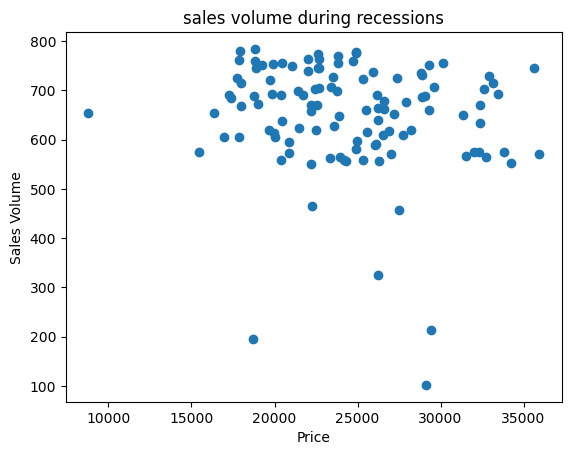

In [53]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.title('sales volume during recessions')
plt.show()

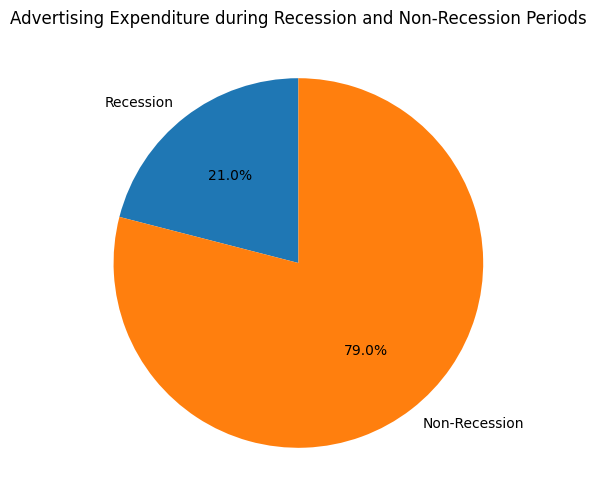

In [55]:
#TASK 1.7
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]
# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()
# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

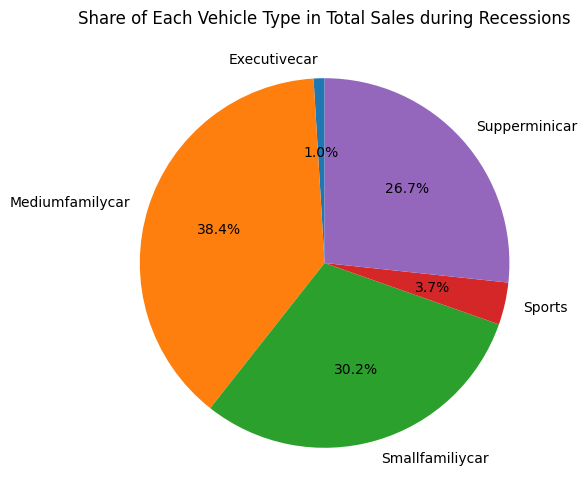

In [56]:
#TASK 1.8
# Filter the data 
Rdata = df[df['Recession'] == 1]
# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(6, 6))
labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

<ipython-input-61-76aeea25d0cd>:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='Vehicle_Type', y='unemployment_rate',


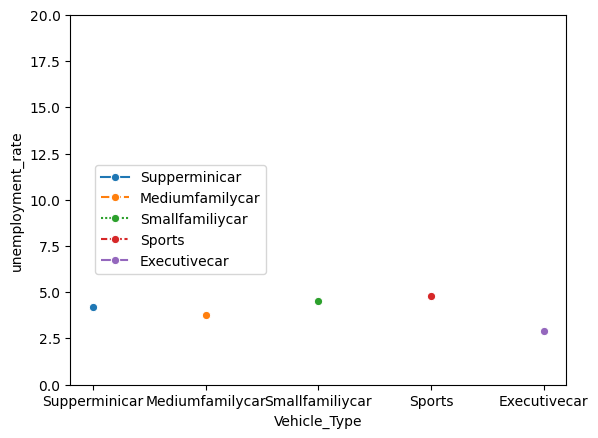

In [61]:
#TASK 1.9
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='Vehicle_Type', y='unemployment_rate',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,20)
plt.legend(loc=(0.05,.3))
plt.show()

In [62]:
#TASK 1.10
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [64]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1